カテゴリ分布から得られるデータが増えるに従って、ベイズ更新によるパラメータ分布が真の値に近づいていくことを確認する。

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import multinomial
from scipy.stats import dirichlet
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# 事前分布の初期パラメータ
alpha = np.array([1,1,1])
# 多項分布の真のパラメータ
true_mu = np.array([0.6,0.2,0.2])

In [3]:
def draw_dirichlet(pdf, ax):
  # ３次元ディリクレ分布を可視化するメソッド
  def _map2org(x,y):
    A = np.array([[(3**0.5)/2,0, -(3**0.5)/2],[-0.5, 1, -0.5],])
    aa = np.linalg.inv([[A[0,0]-A[0,2], A[0,1]-A[0,2]],[A[1,0]-A[1,2],A[1,1]-A[1,2]]])
    org_x, org_y = np.matmul(aa, [x-A[0,2],y-A[1,2]])
    return org_x, org_y, 1-org_x-org_y

  x_arr = np.arange(-(3**0.5)/2, (3**0.5)/2, 0.01)
  y_arr = np.arange(-0.5, 1.0, 0.01)
  disp_prob = np.zeros(shape=(len(y_arr),len(x_arr)))
  for i,x in enumerate(x_arr):
    for j,y in enumerate(y_arr):
      org_x, org_y, org_z = _map2org(x,y)
      if org_x <0 or org_y <0 or org_z <0: 
        disp_prob[j,i] = 0.0
      else:
        prob = pdf([org_x, org_y, org_z])
        disp_prob[j,i] = prob
  ax.contourf(x_arr,y_arr,disp_prob, cmap='Blues')

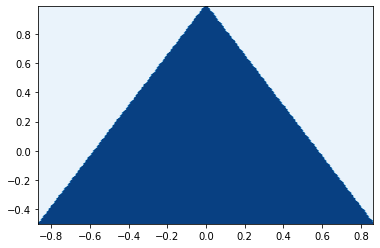

In [4]:
# 事前分布を可視化
draw_dirichlet(dirichlet(alpha).pdf, plt)

In [5]:
# データを3個生成
x = multinomial(3, p=true_mu).rvs()
x

array([[0, 2, 1]])

In [6]:
# 分布を更新
alpha += x[0]
alpha

array([1, 3, 2])

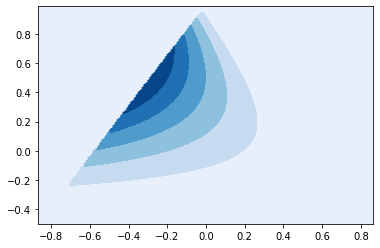

In [7]:
# 事後分布を描画
draw_dirichlet(dirichlet(alpha).pdf, plt)

Get data :[4 0 1]
Get data :[4 0 1]
Get data :[0 2 3]
Get data :[0 4 1]
Get data :[3 0 2]


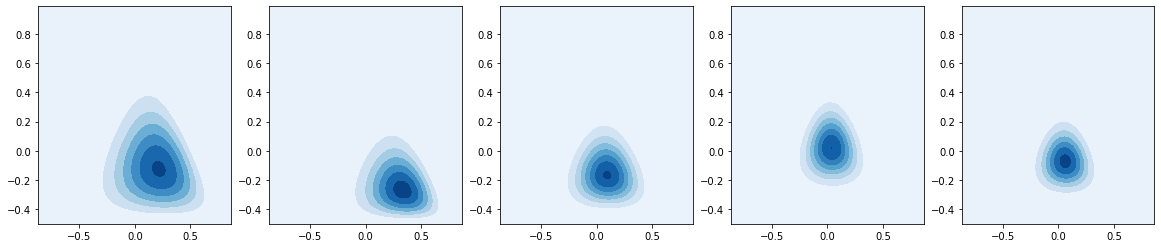

In [8]:
# データを5個生成するごとに描画
fig, axis = plt.subplots(1,5,figsize=(20,4))
for i in range(5):
  x = multinomial(5, p=true_mu).rvs()
  print('Get data :{}'.format(x[0]))
  alpha += x[0]
  draw_dirichlet(dirichlet(alpha).pdf, axis[i])